<a href="https://colab.research.google.com/github/maya-g-y/Final-Project-ML-Module--Spotify/blob/main/Spotify1_Data_Prep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Spotify Project
####Research objectives - Which musical features most strongly differentiate between genres

# Data Preperation

In [ ]:
# Import required library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

### 1. Uploading the data





In [ ]:
# Load the dataset from Kaggle (only one source is used, so no table merging is required)
import kagglehub

# Download latest version
path = kagglehub.dataset_download("joebeachcapital/30000-spotify-songs")

print("Path to dataset files:", path)

Using Colab cache for faster access to the '30000-spotify-songs' dataset.
Path to dataset files: /kaggle/input/30000-spotify-songs


In [ ]:
import os

# Display dataset information
print("Dataset path:", path)
print("Files in dataset:")
print(os.listdir(path))


Dataset path: /kaggle/input/30000-spotify-songs
Files in dataset:
['readme.md', 'spotify_songs.csv']


In [ ]:
#Look at the Data
df = pd.read_csv(f"{path}/spotify_songs.csv")
df.head()


,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


In [ ]:
print("Shape of Dataset :",df.shape)

Shape of Dataset : (32833, 23)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  32833 non-null  object 
 1   track_name                32828 non-null  object 
 2   track_artist              32828 non-null  object 
 3   track_popularity          32833 non-null  int64  
 4   track_album_id            32833 non-null  object 
 5   track_album_name          32828 non-null  object 
 6   track_album_release_date  32833 non-null  object 
 7   playlist_name             32833 non-null  object 
 8   playlist_id               32833 non-null  object 
 9   playlist_genre            32833 non-null  object 
 10  playlist_subgenre         32833 non-null  object 
 11  danceability              32833 non-null  float64
 12  energy                    32833 non-null  float64
 13  key                       32833 non-null  int64  
 14  loudne

In [ ]:
# Create a copy of the original dataframe to preserve the raw data
df_prep= df.copy()

In [ ]:
# Select only columns with dtype = object
object_cols = df_prep.select_dtypes(include=['object'])

# Print the names of the object features
print("Object type features:")
print(object_cols.columns.tolist())




Object type features:
['track_id', 'track_name', 'track_artist', 'track_album_id', 'track_album_name', 'track_album_release_date', 'playlist_name', 'playlist_id', 'playlist_genre', 'playlist_subgenre']


In [ ]:
# Show the first rows of these features
object_cols.head()

,track_id,track_name,track_artist,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,playlist_subgenre
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop


### 2. Convert an objects into viable data

In [ ]:
# 1. Convert all object columns to string EXCEPT track_album_release_date
obj_cols = df_prep.select_dtypes(include=['object']).columns.drop("track_album_release_date")
df_prep[obj_cols] = df_prep[obj_cols].astype("string")

print("Converted to string:")
print(obj_cols.tolist())

# 2. Convert track_album_release_date to datetime
df_prep["track_album_release_date"] = pd.to_datetime(
    df_prep["track_album_release_date"], errors="coerce"
)

# 3. Extract year and month as integers
df_prep["release_year"] = df_prep["track_album_release_date"].dt.year.astype("Int64")
df_prep["release_month"] = df_prep["track_album_release_date"].dt.month.astype("Int64")

# Quick check
print(df_prep[["track_album_release_date", "release_year", "release_month"]].head())




Converted to string:
['track_id', 'track_name', 'track_artist', 'track_album_id', 'track_album_name', 'playlist_name', 'playlist_id', 'playlist_genre', 'playlist_subgenre']
  track_album_release_date  release_year  release_month
0               2019-06-14          2019              6
1               2019-12-13          2019             12
2               2019-07-05          2019              7
3               2019-07-19          2019              7
4               2019-03-05          2019              3


In [ ]:
df_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   track_id                  32833 non-null  string        
 1   track_name                32828 non-null  string        
 2   track_artist              32828 non-null  string        
 3   track_popularity          32833 non-null  int64         
 4   track_album_id            32833 non-null  string        
 5   track_album_name          32828 non-null  string        
 6   track_album_release_date  30947 non-null  datetime64[ns]
 7   playlist_name             32833 non-null  string        
 8   playlist_id               32833 non-null  string        
 9   playlist_genre            32833 non-null  string        
 10  playlist_subgenre         32833 non-null  string        
 11  danceability              32833 non-null  float64       
 12  energy            

### 3. Clean text

In [ ]:
import re
import string

# Define the columns to be cleaned
cols = [
    "playlist_name",
    "track_name",
    "track_album_name",
    "track_artist",
    "playlist_genre",
    "playlist_subgenre",
]

# ensure pandas StringDtype first
df_prep[cols] = df_prep[cols].astype("string")

# regex class for punctuation
punct_class = "[" + re.escape(string.punctuation) + "]"

for c in cols:
    s = df_prep[c].astype("string")
    # remove punctuation
    s = s.str.replace(punct_class, "", regex=True)
    # remove emojis / non-alphanumeric (keep letters, digits, whitespace)
    s = s.str.replace(r"[^A-Za-z0-9\s]", "", regex=True)
    # lowercase, trim, collapse multiple spaces
    s = s.str.lower().str.strip().str.replace(r"\s+", " ", regex=True)
    df_prep[c] = s.astype("string")


# verify dtypes
print(df_prep[cols].dtypes)




playlist_name        string[python]
track_name           string[python]
track_album_name     string[python]
track_artist         string[python]
playlist_genre       string[python]
playlist_subgenre    string[python]
dtype: object


In [ ]:
df_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   track_id                  32833 non-null  string        
 1   track_name                32828 non-null  string        
 2   track_artist              32828 non-null  string        
 3   track_popularity          32833 non-null  int64         
 4   track_album_id            32833 non-null  string        
 5   track_album_name          32828 non-null  string        
 6   track_album_release_date  30947 non-null  datetime64[ns]
 7   playlist_name             32833 non-null  string        
 8   playlist_id               32833 non-null  string        
 9   playlist_genre            32833 non-null  string        
 10  playlist_subgenre         32833 non-null  string        
 11  danceability              32833 non-null  float64       
 12  energy            

### 4. Exploring features

In [ ]:
# Define column groups
id_cols = [c for c in df_prep.columns if "id" in c.lower()]
categorical_cols = [
    "playlist_name",
    "track_name",
    "track_album_name",
    "track_artist",
    "playlist_genre",
    "playlist_subgenre"
]
numeric_cols = df_prep.select_dtypes(include=["number"]).columns.tolist()
date_cols = ["track_album_release_date"]

# Explore relevant groups
text_cols = [c for c in categorical_cols if c not in id_cols]

for col in text_cols:
    print(f"\nColumn: {col}")
    print("Unique values:", df_prep[col].nunique(dropna=False))

    vc = df_prep[col].value_counts(dropna=False)

    print("\nTop 5 categories:")
    print(vc.head(5))

    print("\nBottom 5 categories:")
    print(vc.tail(5))



Column: playlist_name
Unique values: 423

Top 5 categories:
playlist_name
indie poptimism       579
permanent wave        514
urban contemporary    457
post teen pop         317
electropop            308
Name: count, dtype: Int64

Bottom 5 categories:
playlist_name
intro to permanent wave                        8
big white roomjessiej                          7
csr 1039 gta sa                                7
top 50 global 2020 updated weekly worldwide    6
alpas music festival                           3
Name: count, dtype: Int64

Column: track_name
Unique values: 22802

Top 5 categories:
track_name
           168
poison      22
breathe     21
alive       20
forever     20
Name: count, dtype: Int64

Bottom 5 categories:
track_name
its you radio edit                      1
reality feat janieck devy radio edit    1
dancing in the headlights radio edit    1
cool girl                               1
smooth feat rob thomas                  1
Name: count, dtype: Int64

Column: track_album_

In [ ]:
# Explore categorical features: unique counts, top/bottom categories, and rows affected by custom thresholds

def explore_categories_many(df, cols=None, default_min_count=30, per_col_threshold=None, top_n=5, bottom_n=5):
    """
    Explore multiple categorical columns with custom thresholds per column.
    per_col_threshold: dict like {"playlist_name": 40, "track_artist": 2}
    """

    if cols is None:
        cols = [c for c in categorical_cols if c not in id_cols]


    if per_col_threshold is None:
        per_col_threshold = {}

    for col in cols:
        s = df[col]
        n_rows = len(s)
        vc = s.value_counts(dropna=False)
        n_unique = vc.size

        # choose threshold: specific for this col, else default
        th = per_col_threshold.get(col, default_min_count)

        # Identify categories with frequency below the threshold
        below_mask = vc < th
        n_cats_below = below_mask.sum()      # Number of categories below threshold
        rows_below = vc[below_mask].sum()    # Total rows affected if we remove them
        pct_rows_below = (rows_below / n_rows * 100) if n_rows else 0.0  # Percentage of affected rows

        # Print exploration summary for this column
        print(f"\n=== Explore: {col} ===")
        print(f"Unique categories: {n_unique}")
        print(f"Categories below {th}: {n_cats_below}")
        print(f"Rows affected if reduced now: {rows_below} ({pct_rows_below:.2f}%)")

        # Display the most and least frequent categories
        print("\nTop categories:")
        print(vc.head(top_n))
        print("\nBottom categories:")
        print(vc.tail(bottom_n))

# Define custom frequency thresholds per column (used in the exploration function)
thresholds = {
    "playlist_name": 50,
    "track_name": 2,
    "track_artist": 2,
    "track_album_name": 2,
}



In [ ]:
# Just inspect first
explore_categories_many(
    df_prep,
    default_min_count=30,
    per_col_threshold=thresholds
)



=== Explore: playlist_name ===
Unique categories: 423
Categories below 50: 112
Rows affected if reduced now: 3606 (10.98%)

Top categories:
playlist_name
indie poptimism       579
permanent wave        514
urban contemporary    457
post teen pop         317
electropop            308
Name: count, dtype: Int64

Bottom categories:
playlist_name
intro to permanent wave                        8
big white roomjessiej                          7
csr 1039 gta sa                                7
top 50 global 2020 updated weekly worldwide    6
alpas music festival                           3
Name: count, dtype: Int64

=== Explore: track_name ===
Unique categories: 22802
Categories below 2: 17686
Rows affected if reduced now: 17686 (53.87%)

Top categories:
track_name
           168
poison      22
breathe     21
alive       20
forever     20
Name: count, dtype: Int64

Bottom categories:
track_name
its you radio edit                      1
reality feat janieck devy radio edit    1
dancing in the 

| Column              | Unique Categories | Categories Below Threshold | % Rows Affected if Reduced | Top Category (count, %)             | Bottom Example (count, %)            | Decision                                |
|---------------------|-------------------|----------------------------|----------------------------|-------------------------------------|--------------------------------------|-----------------------------------------|
| **playlist_name**   | 423               | 112 (<50)                  | 10.98%                     | Indie Poptimism (579, 1.76%)        | Alpas Music Festival (3, 0.01%)      | Reduce rare playlists to 'other'        |
| **track_name**      | 22,802            | 17,686 (<2)                | 53.87%                     | — (168, 0.51%)                      | Smooth (1, 0.00%)                     | Too sparse, likely to drop after EDA    |
| **track_album_name**| 19,332            | 13,749 (<2)                | 41.88%                     | Greatest Hits (142, 0.43%)          | Blackened Eyes (1, 0.00%)             | Too sparse, likely to drop after EDA    |
| **track_artist**    | 10,652            | 6,101 (<2)                 | 18.58%                     | Martin Garrix (161, 0.49%)          | Marky Mark & The Funky Bunch (1, 0.00%) | Keep with reduction (rare → other)     |
| **playlist_genre**  | 6                 | 0 (<30)                    | 0.00%                      | EDM (6043, 18.4%)                   | Rock (4951, 15.1%)                    | Keep as-is (no reduction needed)        |
| **playlist_subgenre**| 24               | 0 (<30)                    | 0.00%                      | Progressive Electro House (1809, 5.5%) | Reggaeton (949, 2.9%)                 | Keep as-is (no reduction needed)        |


### 5. Narrowing Categories

In [ ]:
# Function to reduce rare categories in a chosen column by grouping them into 'other'

def reduce_categories(df, col, min_count=30, other_label="other"):
    """
    Reduce rare categories in a column to 'other'.

    Parameters:
        df (pd.DataFrame): The dataframe to modify.
        col (str): The column name to reduce.
        min_count (int): Minimum count to keep a category. Categories with fewer will be set to 'other'.
        other_label (str): The label for reduced categories.

    Returns:
        pd.DataFrame: The dataframe with reduced categories.
    """
    vc = df[col].value_counts(dropna=False)

    # keep categories with count >= min_count (inclusive)
    keep = set(vc[vc >= min_count].index)

    # count before reduction
    n_unique_before = df[col].nunique(dropna=False)

    # do not touch NaN; only replace values not in 'keep'
    mask_keep_or_nan = df[col].isin(keep) | df[col].isna()
    df[col] = df[col].where(mask_keep_or_nan, other_label)

    # count after reduction
    n_unique_after = df[col].nunique(dropna=False)
    n_other = (df[col] == other_label).sum()

    print(f"\nColumn: {col}")
    print(f"Unique before: {n_unique_before}")
    print(f"Unique after:  {n_unique_after}")
    print(f"Rows labeled as '{other_label}': {n_other}")

    return df



In [ ]:
df_test2 = df_prep.copy(deep=True)

In [ ]:
# Reduce on the copy#2
df_test2 = reduce_categories(df_test2, "playlist_name", min_count=50)
df_test2 = reduce_categories(df_test2, "track_artist", min_count=2)


Column: playlist_name
Unique before: 423
Unique after:  312
Rows labeled as 'other': 3606

Column: track_artist
Unique before: 10652
Unique after:  4552
Rows labeled as 'other': 6101


In [ ]:
# Apply to the real df
df_prep= df_test2

In [ ]:
df_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   track_id                  32833 non-null  string        
 1   track_name                32828 non-null  string        
 2   track_artist              32828 non-null  string        
 3   track_popularity          32833 non-null  int64         
 4   track_album_id            32833 non-null  string        
 5   track_album_name          32828 non-null  string        
 6   track_album_release_date  30947 non-null  datetime64[ns]
 7   playlist_name             32833 non-null  string        
 8   playlist_id               32833 non-null  string        
 9   playlist_genre            32833 non-null  string        
 10  playlist_subgenre         32833 non-null  string        
 11  danceability              32833 non-null  float64       
 12  energy            

In [ ]:
numeric_cols

['track_popularity',
 'danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'duration_ms',
 'release_year',
 'release_month']

##Checking the numeric features

In [ ]:
# Explore numeric features: check missing values, zeros, and outliers

for col in numeric_cols:
    s = df_prep[col]
    n = len(s)
    nonnull = s.notna().sum()
    missing = s.isna().sum()

   # Count zeros only if the column is numeric
    if pd.api.types.is_numeric_dtype(s):
        zeros = (s == 0).sum()
    else:
        zeros = np.nan

    # Calculate the interquartile range (IQR) to detect potential outliers
    q1, q3 = s.quantile([0.25, 0.75])
    iqr = q3 - q1
    lo, hi = q1 - 1.5*iqr, q3 + 1.5*iqr
    outliers = ((s < lo) | (s > hi)).sum()

    print(f"\n=== Numeric feature: {col} ===")
    print(f"dtype:           {s.dtype}")
    print(f"count:           {nonnull}/{n}  |  missing: {missing} ({missing/n*100:.2f}%)")
    print(f"unique:          {s.nunique(dropna=True)}")
    print(f"zeros:           {zeros} ({zeros/n*100:.2f}%)" if not pd.isna(zeros) else "zeros: n/a")
    print(f"min / q1 / med / mean / q3 / max:")
    print(f"{s.min():.3f}  {q1:.3f}  {s.median():.3f}  {s.mean():.3f}  {q3:.3f}  {s.max():.3f}")
    print(f"std: {s.std():.3f}  |  skew: {s.skew():.3f}")
    print(f"IQR bounds: [{lo:.3f}, {hi:.3f}]  |  outliers: {outliers} ({outliers/nonnull*100:.2f}%)")




=== Numeric feature: track_popularity ===
dtype:           int64
count:           32833/32833  |  missing: 0 (0.00%)
unique:          101
zeros:           2703 (8.23%)
min / q1 / med / mean / q3 / max:
0.000  24.000  45.000  42.477  62.000  100.000
std: 24.984  |  skew: -0.233
IQR bounds: [-33.000, 119.000]  |  outliers: 0 (0.00%)

=== Numeric feature: danceability ===
dtype:           float64
count:           32833/32833  |  missing: 0 (0.00%)
unique:          822
zeros:           1 (0.00%)
min / q1 / med / mean / q3 / max:
0.000  0.563  0.672  0.655  0.761  0.983
std: 0.145  |  skew: -0.504
IQR bounds: [0.266, 1.058]  |  outliers: 291 (0.89%)

=== Numeric feature: energy ===
dtype:           float64
count:           32833/32833  |  missing: 0 (0.00%)
unique:          952
zeros:           0 (0.00%)
min / q1 / med / mean / q3 / max:
0.000  0.581  0.721  0.699  0.840  1.000
std: 0.181  |  skew: -0.636
IQR bounds: [0.192, 1.228]  |  outliers: 277 (0.84%)

=== Numeric feature: key ===
dt

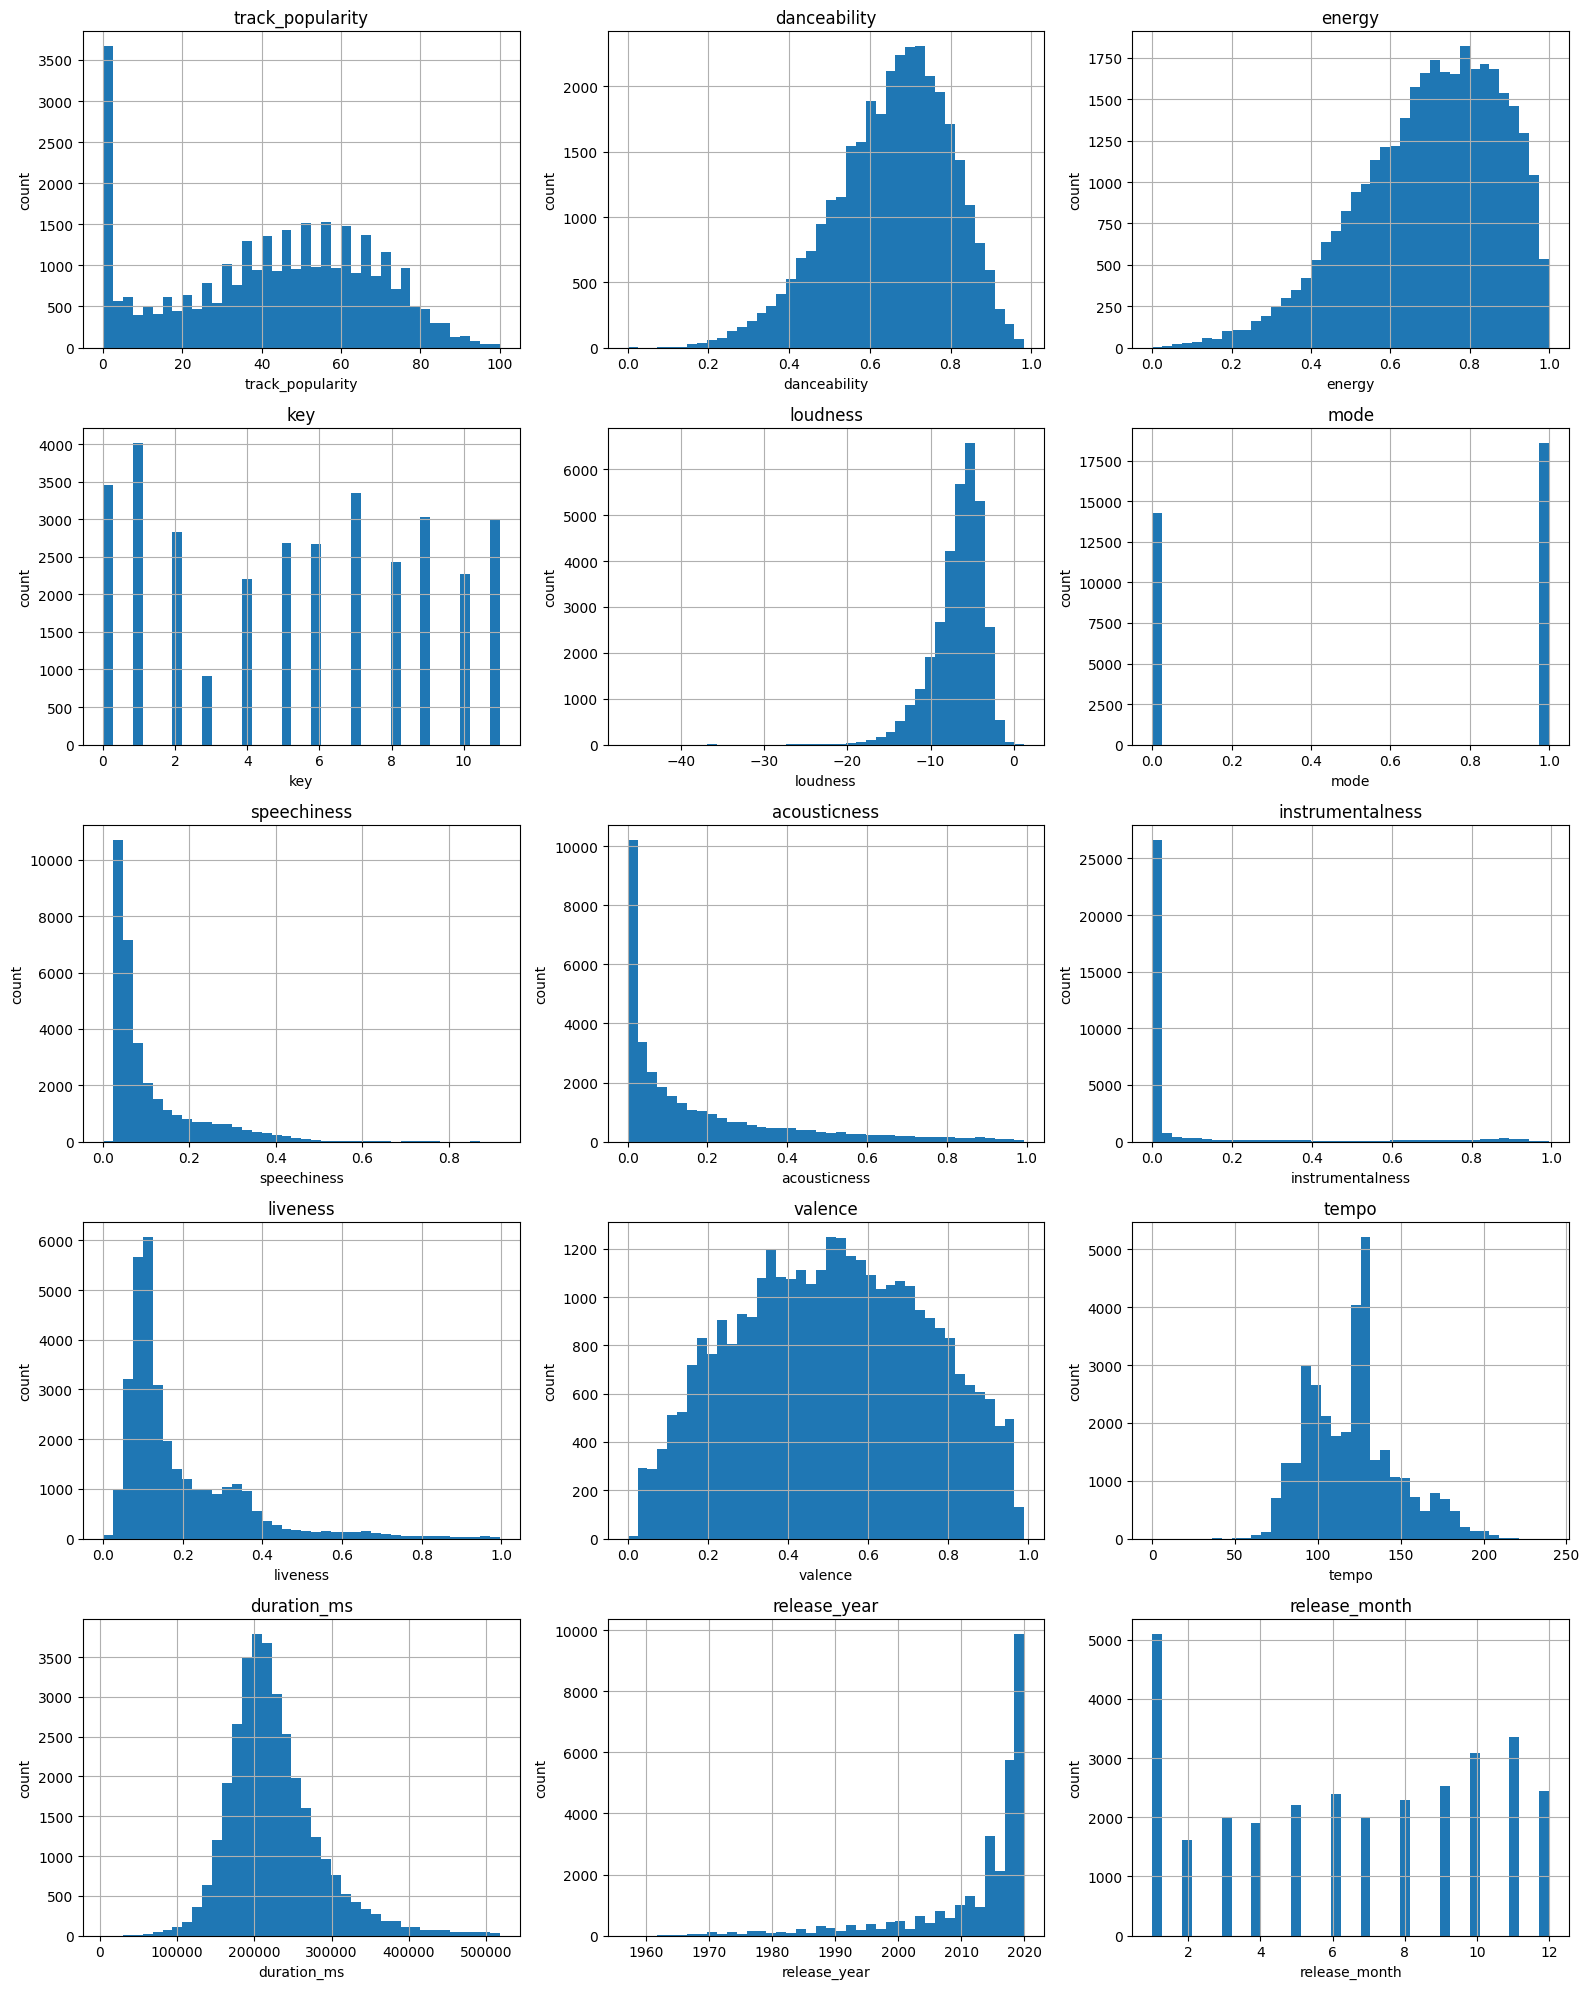

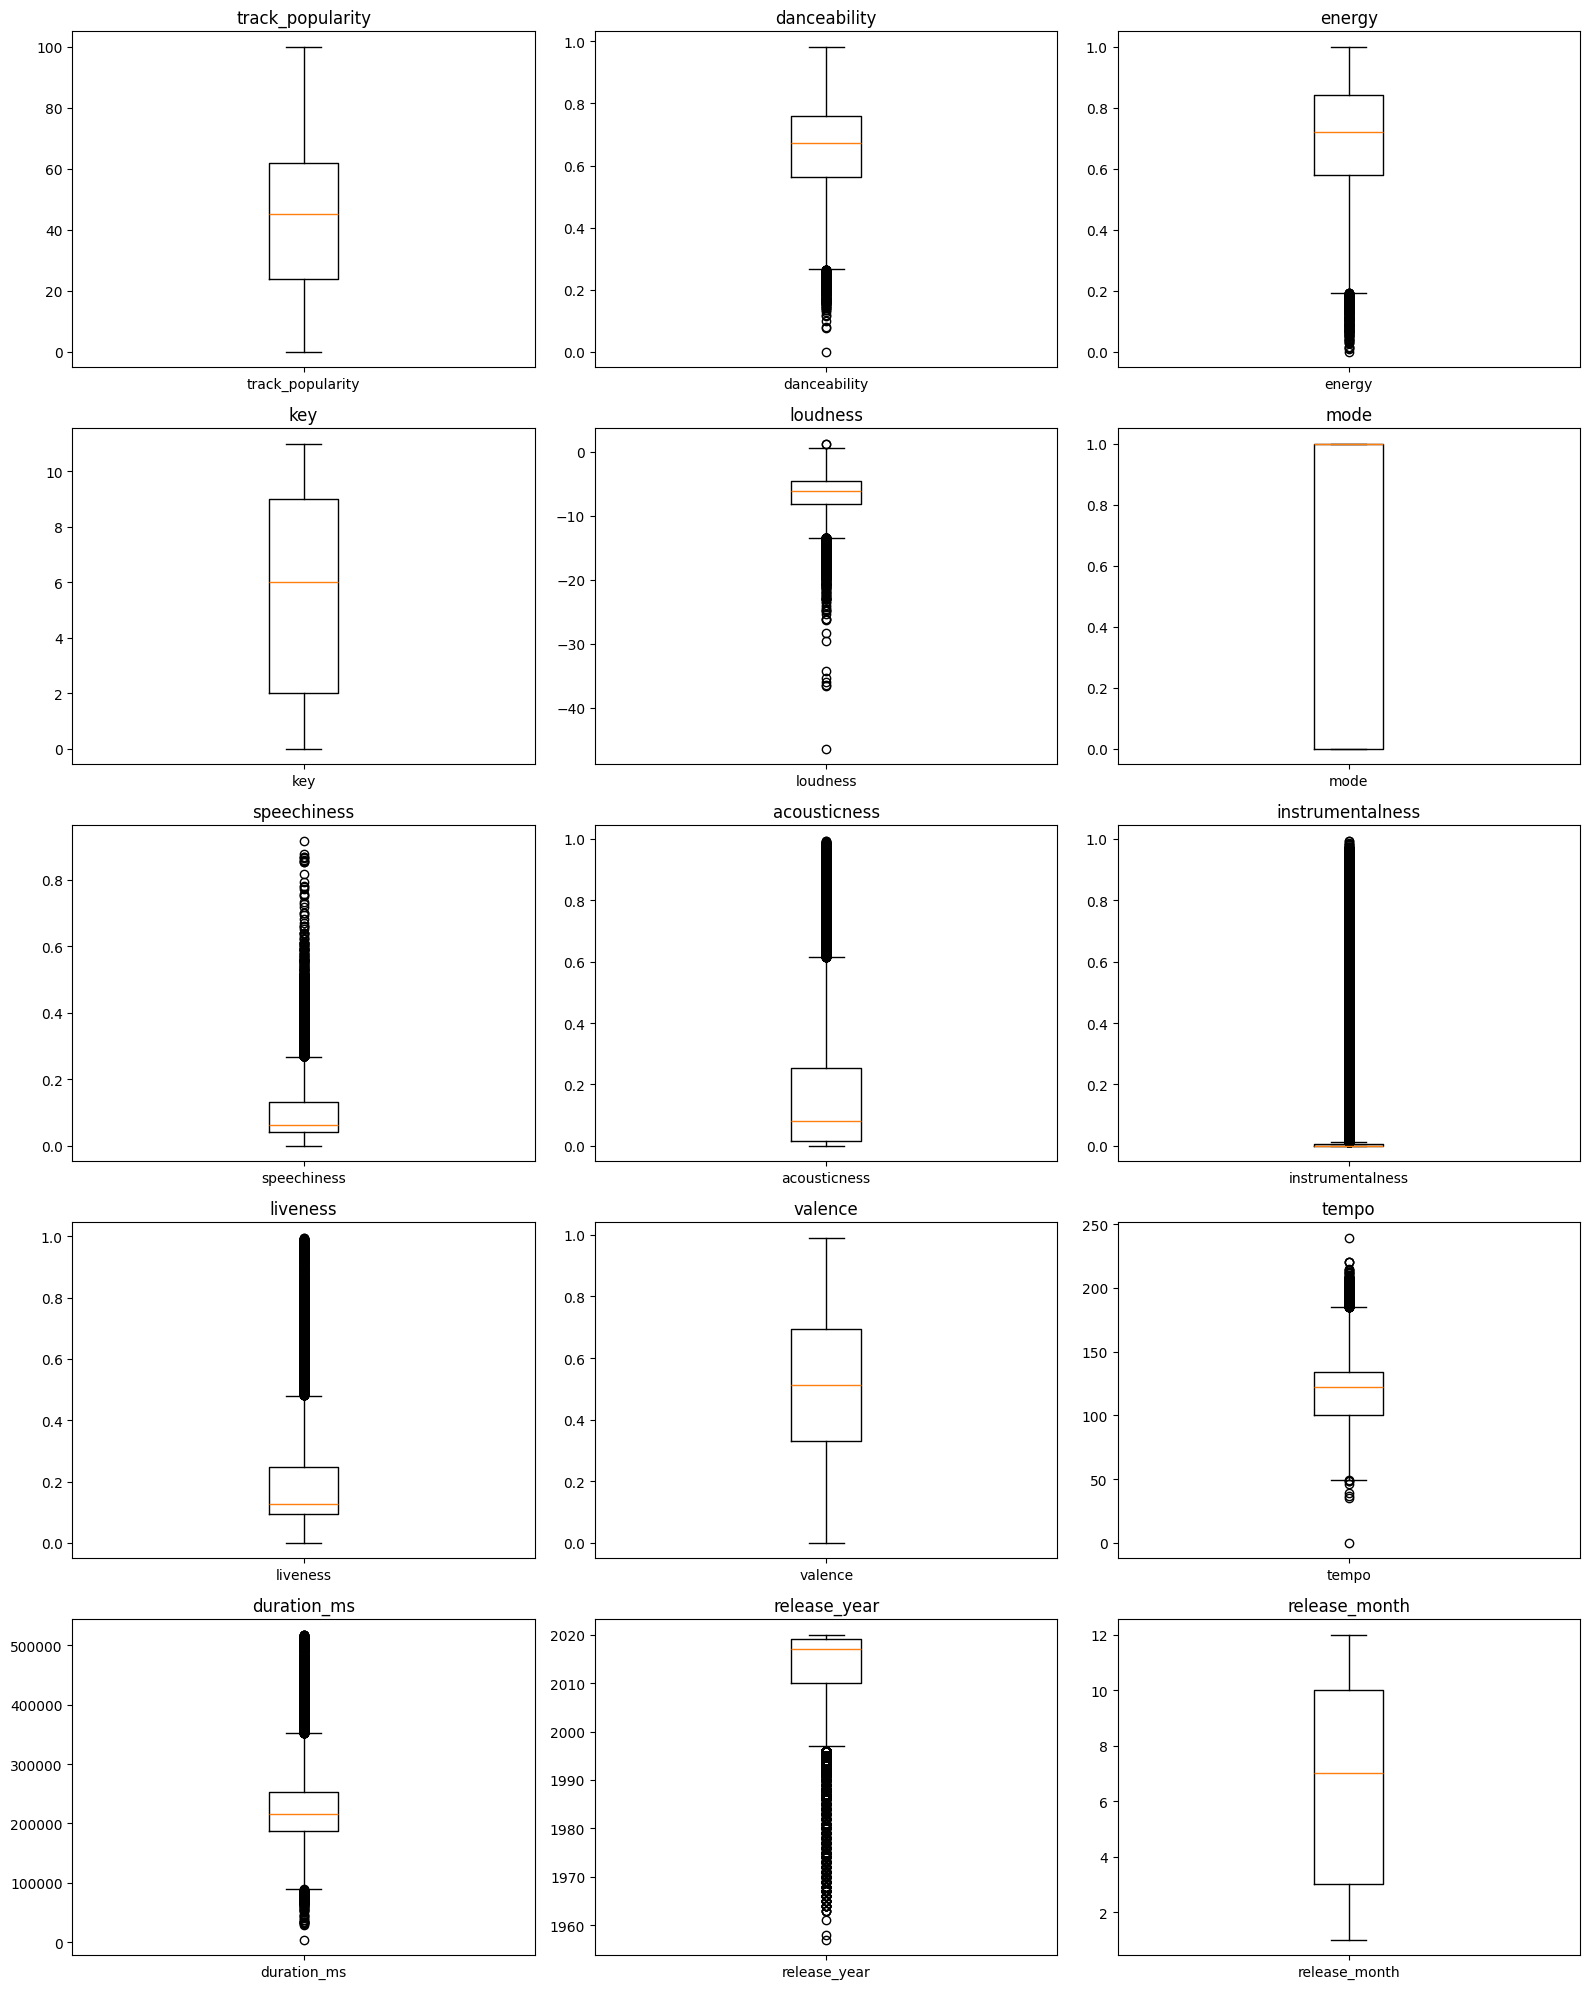

In [ ]:
import math

def plot_histograms(df, cols, bins=30):
    """Plot histograms for a list of numeric columns."""
    n = len(cols)
    r = math.ceil(n/3)
    plt.figure(figsize=(16, 4*r))

    # Create one histogram per numeric column
    for i, c in enumerate(cols, 1):
        plt.subplot(r, 3, i)
        df[c].hist(bins=bins)
        plt.title(c)
        plt.xlabel(c); plt.ylabel("count")
    plt.tight_layout(); plt.show()

def plot_boxplots(df, cols):
    """Plot boxplots to visually inspect outliers."""
    r = math.ceil(len(cols)/3)
    plt.figure(figsize=(16, 4*r))

    # Create one boxplot per numeric column
    for i, c in enumerate(cols, 1):
        plt.subplot(r, 3, i)
        plt.boxplot(df[c].dropna(), vert=True, labels=[c])
        plt.title(c)
    plt.tight_layout(); plt.show()

# Visualize the numeric features
plot_histograms(df_prep, numeric_cols, bins=40)
plot_boxplots(df_prep, numeric_cols)


##Save to pickle

In [ ]:
# Save cleaned dataframe
df_prep.to_pickle("spotify_flat_file.pkl")

# Load it later
df_loaded = pd.read_pickle("spotify_flat_file.pkl")


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Save also a permanent copy in Google Drive
df_prep.to_pickle("/content/drive/MyDrive/pickle_files/spotify_flat_file.pkl")

print("Saved cleaned dataframe to Google Drive.")


Mounted at /content/drive
Saved cleaned dataframe to Google Drive.


# We got A flat file, Next to EDA!!